# ISEL - CPS 
## Semestre 2022/23
# <br>
###  <center> Trabalho Prático 1 </center>
# </br>


Trabalho realizado por:
* Bárbara Jesus, numero <b> 45108 </b>
* João Fernandes, numero <b> 47478 </b>
* Duarte Afonso, numero <b> 47736 </b>

<b> Turma L33D - Docente Michele Mengucci</b>
 


A figura representa o esquema típico do processo de envio e recepção de informação usando modulações
digitais.

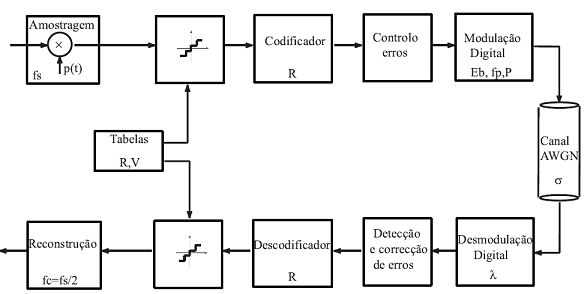

O 1º trabalho foca os blocos Quantificação/ Desquantificação do sinal e Códigos Detectores e Correctores de Erros. 

Além disso inclui uma revisão teórica da Amostragem e Reconstrução.




# A. Amostragem

1. Considere o sinal $x(t) = 20000 cos(2\pi 5025 t) + 10000 sin(2\pi 2507 t)$. Estude o sinal teoricamente. Apresente a expressão do espetro do sinal e represente numa figura o espectro de Amplitude e de Fase do sinal.


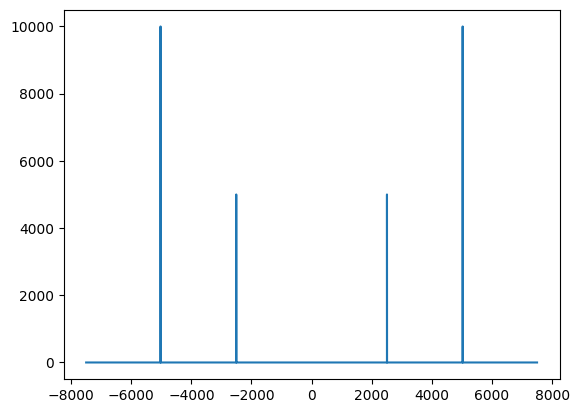

2. Gere o sinal $x(t)$ usando o Python. Cnsidere o intervalo de tempo $0 < t < 1\,ms$, e a frequência de amostragem de 48KHz. Apresente numa figura o sinal no domínio do tempo e noutra figura o seu espetro de amplitude.


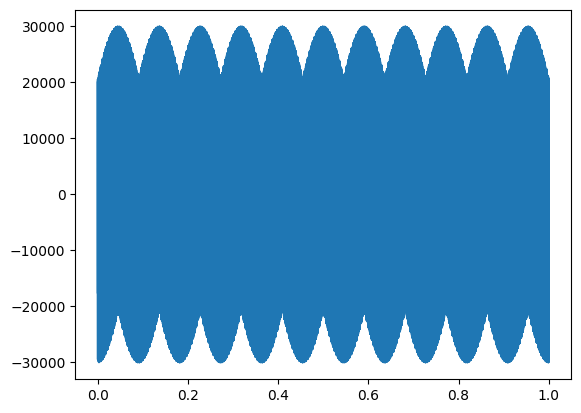

In [10]:
import numpy as np
import matplotlib.pyplot as plt

fs = 48000
Ts = 1 / fs

t = np.arange(0, 1, Ts)

# x = 20000 * np.cos(2 * np.pi * 5025 * t) + 10000 * np.sin(2 * np.pi * 2507 * t)
x = 20000 * np.cos(2 * np.pi * 5025 * t) + 10000 * np.cos(2 * np.pi * 2507 * t - np.pi / 2)

freq = np.linspace(-fs/2, fs/2, len(x))
X1 = np.fft.fft(x) / len(x)
X1Shift = np.fft.fftshift(X1)
Amplitude = np.abs(X1Shift)
plt.plot(t, x)
#plt.plot(freq, Amplitude)

3. Admitindo que faz a amostragem do sinal com uma frequência $f_s = 8kHz$, represente o espectro do sinal amostrado. Comente os resultados apresentados.

# B. Quantificação

4. Construa uma função em Python que crie as tabelas com os valores de decisão e valores de quantificação para um quantificador uniforme. 

    Esta função tem como parâmetros de entrada o número de bits por amostra (R), o valor máximo a quantificar (Vmax) e o tipo de quantificador (midrse ou midtread). Como parâmetros de saída deve devolver dois Numpy arrays com valores de quantificação e os valores de decisão.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def Quantific(R,Vmax,Qtype):
    #implementacao
    return Vq, Dq

## Verifique se a sua implementação
Realize um conjunto de testes unitários. Admita que $R=3$ e $Vmax=1$, para uma quantificação midtread.
* use uma lista de valores (poucos para conseguir validar manualmente)
* use uma arange entre -Vmax e Vmax

In [ ]:
Vq, Dq = Quantific(3,1,'midtread')
print('midtread')
print(Vq)
print(Dq)
Vq, Dq = Quantific(3,1,'midrise')
print('midrise')
print(Vq)
print(Dq)

## Implemente o quantificador

Implemente uma função que realize a quantificação


In [ ]:
# Função que implementa o Quantificador
# in: 
# x - sinal com amostras (nao quantificadas)
# Vq, Dq - valores de quantificação e valores de decisão
# out: 
# xq - sinal quantificado
# iq - indices do sinal quantificado
# prototipo da função
# xq, iq = Quantificador(x, Vq, Dq)
def Quantificador(x, Vq, Dq):
    #implementacao
    return xq, iq

## Use uma função sinusoidal e represente o sinal original, quantificado e o sinal de erro

Represente o histograma do sinal de erro. Comente os resultados.

## SNR

Crie uma função que meça o SNR prático, ou seja, medindo a potência do sinal e a potência do sinal de erro.


In [ ]:
def Measure_SNRp(x,xq):

    return SNRp

Crie uma função que calcule o SNR para o caso da quantificação uniforme.

$SNRt_{dB}= 6,02 \times N_b + 10 \log_{10} \frac{3 P_x}{V_{max}}$

In [ ]:
def Measure_SNRt(R,Vmax,P):
    #resposta

    return SNRtdb

## Testes
Considere o sinal de rampa já implementado.
Realize a quantificação do sinal x(t) para cada valor de R={3,4,5,6,7,8}.
Meça a SNR prática e o valor teórico. 
Construa um gráfico com ambos os valores da SNR teórica e medida em função do número de bits R. Comente os resultados.

## Testes com voz
Grave um sinal de voz através do microfone com aproximadamente um segundo de duração. Faça a quantifição do sinal para cada valor de R={3,4,5,6,7,8}. Meça a SNR prática e o valor teórico (para determinar a potência no caso teórico deve usar o mesmo valor que na prática). Construa um gráfico com ambos os valores da SNR teórica e SNR medida em função do número de bits R. Comente os resultados

In [ ]:
import scipy.io.wavfile as wav
fs, data = wav.read(".wav")
plt.plot(data)
data

Realize a quantificação do sinal de voz para cada valor de R={3,4,5,6,7,8}. Meça a SNR prática e o valor teórico (para determinar a potência no caso teórico deve usar o mesmo valor que na prática). Construa um gráfico com ambos os valores da SNR teórica e SNR medida em função do número de bits R. Comente os resultados.

## Imagem
Faça a leitura do ficheiro de imagem. Teste o código a baixo com vários valores de Q. Descreva o que produz o
código.

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
Q = 255
im = Image.open("lenac.tif")#"lena_gray.tif")
#type(im)
imq = im.quantize(Q)
#im.show()
plt.imshow(imq,cmap='gray')
print(type(imq))
imagem = np.asarray(imq)
print(imagem.shape)
imagem[:,:]

In [ ]:
np.max(imagem)

In [ ]:
import cv2
image = cv2.imread("lenac.tif")
image

In [ ]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray
cv2.imwrite('testGray.tif', gray)

# C. Codificação/ Descodificação

Construa uma função Python que dado um Numpy array (com dimensão  𝑁 ) com valores inteiros, retorne um Numpy array (com dimensão  𝑁.𝑅×1 ) com os mesmos valores convertidos para binário. Esta função ainda deve receber como parâmetros de entrada o número de bits ( 𝑅 ) a usar na conversão de cada inteiro.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def Codific(arr_signal_quantized,R):
    # resposta
    return arr_binary

Construa uma função que dado um Numpy array com valores os bits, faça a conversão para inteiros (considerando R bits).

In [ ]:
def Descodific(arr_binary,R):
    #resposta
    return arr_signal

Com base nas funções já implementadas, faça a codificação e descodificação PCM uniforme do sinal de áudio previamente gravado. Verifique qual a SNR obtida e ouça o sinal descodificado. Use para o efeito R=3, 5 e 8.

In [ ]:
#Resposta:

## Canal - O canal é modelado pelo modelo Binary Symmetric Channel [BSC](https://en.wikipedia.org/wiki/Binary_symmetric_channel)

Com as duas funções realizadas e admitindo que os restantes blocos do emissor, canal e receptor possam ser simulados pela expressão  𝑦=1∗𝑛𝑝.𝑙𝑜𝑔𝑖𝑐𝑎𝑙_𝑥𝑜𝑟(𝑥,𝑛𝑝.𝑟𝑎𝑛𝑑𝑜𝑚.𝑏𝑖𝑛𝑜𝑚𝑖𝑎𝑙(1,𝐵𝐸𝑅𝑡,𝑙𝑒𝑛(𝑥))) , onde  𝐵𝐸𝑅𝑡  contém o valor pretendido para o bit error rate.

Meça o BER antes e após a correcção de erros, para diferentes valores de  𝐵𝐸𝑅𝑡 .

In [ ]:
#x - array de bits a entrar no canal
#y - array de bits a sair do canal


Considere o sinal de áudio previamente gravado. Meça SNR na recepção e o BER, para diferentes valores de 𝐵𝐸𝑅𝑡 . (considera-se que o ruído é a diferença entre o sinal à entrada do transmissor e o sinal à saída do receptor); Comente os resultados obtidos.

# D.  Deteção e Correção de erros 

Deteção e Correção de erros
Construa uma função que implemente o Hamming(7,4). Utilize a seguinte matriz geradora:

In [ ]:
import numpy as np
G=np.array([[1,0,0,0,1,1,0],[0,1,0,0,1,0,1],[0,0,1,0,0,1,1],[0,0,0,1,1,1,1]])
print(G)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def Hamming_8_4(arr_bits):
    # resposta
    return arr_binary

Construa uma função que dado um Numpy array M bits, para cada 8 bits detecte e corriga possíveis erros, sendo o resultado 4 bits de mensagem.

In [ ]:
def Detetor(arr_binary):
    #resposta
    return arr_bits

Faça um conjunto de testes para verificar o correto funcionamento das funções.

Considere o sinal de áudio previamente gravado. Meça SNR na recepção e o BER após a correcção de erros, para diferentes valores de 𝐵𝐸𝑅𝑡 . (considera-se que o ruído é a diferença entre o sinal à entrada do transmissor e o sinal à saída do receptor); Comente os resultados obtidos.